In [ ]:
import numpy as np
import matplotlib.pyplot as mpl
import cv2
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from keras import Sequential,regularizers
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from keras.callbacks import EarlyStopping
from keras.utils import image_dataset_from_directory
import warnings

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
zipext = ZipFile("/content/ai-and-human-art-classification.zip")
zipext.extractall("/content")
zipext.close()

In [ ]:
train_df = image_dataset_from_directory(
    directory = "/content/ai_art_classification/train",
    image_size=(256,256),
    color_mode = "rgb",
    labels = "inferred",
    batch_size = 32,
    label_mode  = "int",
    validation_split=0.3,
    subset = "training",
    seed = 42
)

test_df = image_dataset_from_directory(
    directory = "/content/ai_art_classification/train",
    image_size=(256,256),
    color_mode = "rgb",
    labels = "inferred",
    batch_size = 32,
    label_mode  = "int",
    validation_split = 0.3,
    subset = "validation",
    seed = 42
)

Found 18618 files belonging to 2 classes.
Using 13033 files for training.
Found 18618 files belonging to 2 classes.
Using 5585 files for validation.


In [ ]:
def convert(image,label):
  image = tf.cast(image/256,tf.float32)
  return image,label

In [ ]:
train_df = train_df.map(convert)
test_df = test_df.map(convert)
train_df

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
AI_generated_img = cv2.imread("/content/ai_art_classification/train/AI_GENERATED/1.jpg")

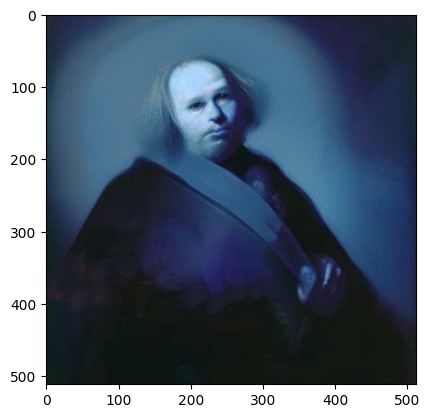

In [ ]:
mpl.imshow(AI_generated_img)

In [ ]:
non_AI_generated_img = cv2.imread("/content/ai_art_classification/train/NON_AI_GENERATED/100.jpg")

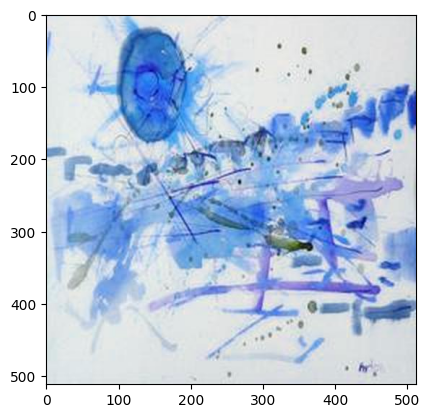

In [ ]:
mpl.imshow(non_AI_generated_img)

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3),activation = "relu",input_shape = (256,256,3),kernel_initializer="he_uniform"))
model.add(Conv2D(32,kernel_size = (3,3),activation = "relu",kernel_initializer="he_uniform",padding = "same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),padding = "same"))

model.add(Conv2D(64,kernel_size = (3,3),activation = "relu",kernel_initializer="he_uniform"))
model.add(Conv2D(64,kernel_size = (3,3),activation = "relu",kernel_initializer="he_uniform",padding = "same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),padding = "same"))

model.add(Conv2D(128,kernel_size = (3,3),activation = "relu",kernel_initializer="he_uniform"))
model.add(Conv2D(128,kernel_size = (3,3),activation = "relu",kernel_initializer="he_uniform",padding = "valid"))
model.add(Conv2D(128,kernel_size = (3,3),activation = "relu",kernel_initializer="he_uniform",padding = "same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),padding = "same"))

model.add(Flatten())


model.add(Dense(32,activation = "relu",kernel_initializer = "he_uniform"))
model.add(Dense(64,activation = "relu",kernel_initializer = "he_uniform"))
model.add(Dense(128,activation = "relu",kernel_initializer = "he_uniform"))
model.add(Dropout(0.3))

model.add(Dense(1,activation = "sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      9248      
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 64)      3

In [ ]:
model.get_weights()

In [ ]:
model.compile(optimizer = "Adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [ ]:
callback = EarlyStopping(
    monitor = "val_loss",
    patience = 5,
    mode = "auto",
    min_delta = 0.001
)

In [ ]:
history = model.fit(train_df,epochs = 1000,callbacks = callback,validation_data = test_df,)

Epoch 1/1000
408/408 [==============================] - 117s 237ms/step - loss: 0.9580 - accuracy: 0.7453 - val_loss: 0.4031 - val_accuracy: 0.8072
Epoch 2/1000
408/408 [==============================] - 97s 236ms/step - loss: 0.3470 - accuracy: 0.8391 - val_loss: 0.3303 - val_accuracy: 0.8360
Epoch 3/1000
408/408 [==============================] - 98s 239ms/step - loss: 0.2909 - accuracy: 0.8723 - val_loss: 0.3045 - val_accuracy: 0.8662
Epoch 4/1000
408/408 [==============================] - 89s 218ms/step - loss: 0.2534 - accuracy: 0.8861 - val_loss: 0.3108 - val_accuracy: 0.8612
Epoch 5/1000
408/408 [==============================] - 98s 238ms/step - loss: 0.2370 - accuracy: 0.8949 - val_loss: 0.3218 - val_accuracy: 0.8636
Epoch 6/1000
408/408 [==============================] - 97s 237ms/step - loss: 0.2033 - accuracy: 0.9107 - val_loss: 0.5249 - val_accuracy: 0.8097
Epoch 7/1000
408/408 [==============================] - 89s 216ms/step - loss: 0.1871 - accuracy: 0.9231 - val_loss: 

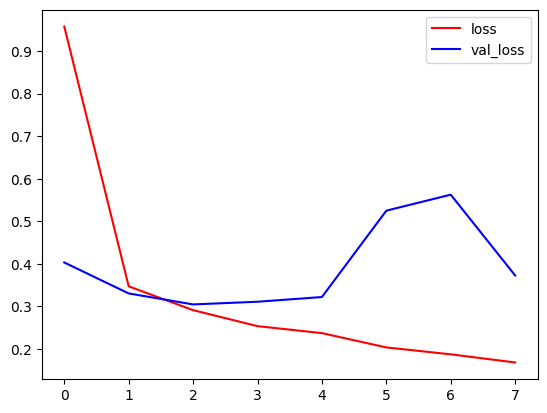

In [ ]:
mpl.plot(history.history["loss"],color = "red",label = "loss")
mpl.plot(history.history["val_loss"],color = "blue",label = "val_loss")
mpl.legend()
mpl.show()

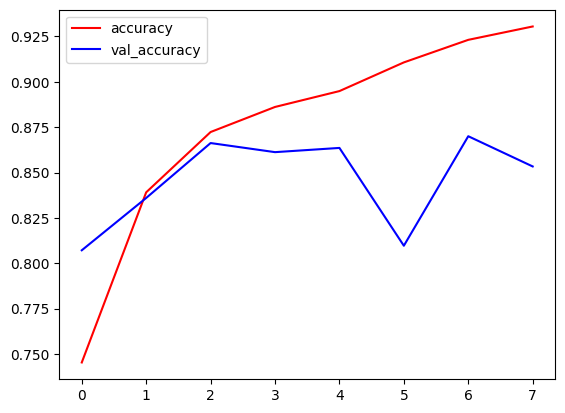

In [ ]:
mpl.plot(history.history["accuracy"],color = "red",label = "accuracy")
mpl.plot(history.history["val_accuracy"],color = "blue",label = "val_accuracy")
mpl.legend()
mpl.show()

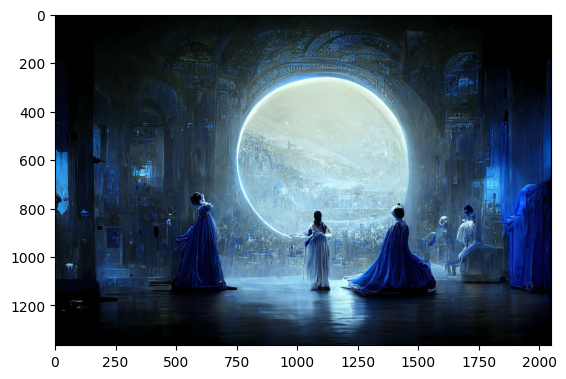

In [ ]:
test_img = cv2.imread("/content/ai_art.jpg")
mpl.imshow(test_img)

In [ ]:
test_img.shape

(1365, 2048, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 28ms/step


array([[0.]], dtype=float32)

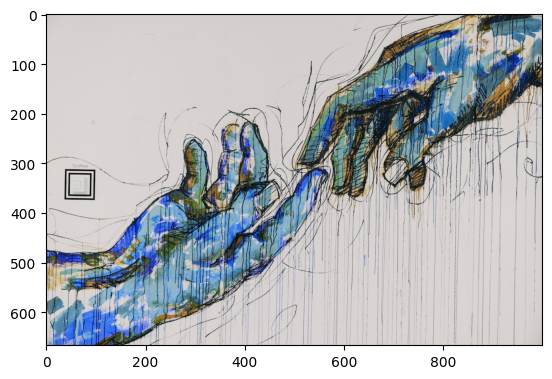

In [ ]:
test_img1 = cv2.imread("/content/art.jpeg")
mpl.imshow(test_img1)

In [ ]:
test_img1.shape

(667, 1000, 3)

In [ ]:
test_img1 = cv2.resize(test_img1,(256,256))

In [ ]:
test_input1 = test_img1.reshape((1,256,256,3))

In [ ]:
model.predict(test_input1)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)

In [ ]:
def check_output(X):
  output = model.predict(X)
  if output == 0:
    return print("AI Generated ART")
  else:
    return print("Non AI Generated ART")

In [ ]:
check_output(test_input)

1/1 [==============================] - 0s 17ms/step
AI Generated ART


In [ ]:
check_output(test_input1)

1/1 [==============================] - 0s 18ms/step
Non AI Generated ART


## **Hyperparameter tuning**

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 12.9 MB/s eta 0:00:00


In [ ]:
import kerastuner as kt

Using TensorFlow backend


In [ ]:
def build_model(hp):
   kt_model = Sequential()

   kt_model.add(Conv2D(hp.Int("filters",max_value = 256,min_value = 32,step = 32),
                       kernel_size=(3,3),activation = "relu",input_shape = (256,256,3),
                       kernel_initializer=hp.Choice("weights",values = ["he_normal","he_uniform"])))
   kt_model.add(Conv2D(hp.Int("filters",max_value = 256,min_value = 32,step = 32),
                       kernel_size=(3,3),activation = "relu",kernel_initializer=hp.Choice("weights",values = ["he_normal","he_uniform"])))
   kt_model.add(BatchNormalization())
   kt_model.add(MaxPooling2D(pool_size = (2,2),padding = "same"))

   kt_model.add(Conv2D(hp.Int("filters",max_value = 256,min_value = 32,step = 32),
                       kernel_size=(3,3),activation = "relu",kernel_initializer=hp.Choice("weights",values = ["he_normal","he_uniform"])))
   kt_model.add(Conv2D(hp.Int("filters",max_value = 256,min_value = 32,step = 32),
                       kernel_size=(3,3),activation = "relu",kernel_initializer=hp.Choice("weights",values = ["he_normal","he_uniform"])))
   kt_model.add(Conv2D(hp.Int("filters",max_value = 256,min_value = 32,step = 32),
                       kernel_size=(3,3),activation = "relu",kernel_initializer=hp.Choice("weights",values = ["he_normal","he_uniform"])))
   kt_model.add(BatchNormalization())
   kt_model.add(MaxPooling2D(pool_size = (2,2),padding = "same"))

   kt_model.add(Flatten())

   kt_model.add(Dense(hp.Int("units",max_value = 256,min_value = 32,step = 32),activation = "relu",
                      kernel_initializer=hp.Choice("weights",values = ["he_normal","he_uniform"])))
   kt_model.add(Dense(hp.Int("units",max_value = 256,min_value = 32,step = 32),activation = "relu",
                      kernel_initializer=hp.Choice("weights",values = ["he_normal","he_uniform"])))
   kt_model.add(Dropout(hp.Choice("dropout",values = [0.2,0.3,0.4,0.5])))

   kt_model.add(Dense(1,activation = "sigmoid"))

   optimizer = hp.Choice("optimizer",values = ["Adam","sgd","rmsprop","nadam","adadelta"])

   kt_model.compile(optimizer = optimizer,loss = "binary_crossentropy",metrics = "accuracy")

   return kt_model


In [ ]:
tuner = kt.RandomSearch(build_model,objective = "val_loss",max_trials = 5,seed = 42,)

In [ ]:
tuner.search(train_df,epochs = 5,validation_data = test_df)


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
192               |192               |filters
he_normal         |he_normal         |weights
128               |128               |units
0.3               |0.3               |dropout
adadelta          |adadelta          |optimizer

Epoch 1/5
  6/408 [..............................] - ETA: 8:32 - loss: 0.8697 - accuracy: 0.4948

408/408 [==============================] - 712s 2s/step - loss: 0.4184 - accuracy: 0.8057 - val_loss: 0.3069 - val_accuracy: 0.8530
Epoch 2/5
408/408 [==============================] - ETA: 0s - loss: 0.2334 - accuracy: 0.8979

In [ ]:
kt_model = tuner.get_best_models(num_models=1)[0]

In [ ]:
history = kt_model.fit(train_df,epochs = 1000,initial_epoch=5,validation_data = test_df,callbacks = callback)

In [ ]:
mpl.plot(history.history["loss"],color = "red",label = "loss")
mpl.plot(history.history["val_loss"],color = "blue",label = "val_loss")
mpl.legend()
mpl.show()

In [ ]:
mpl.plot(history.history["accuracy"],color = "red",label = "accuracy")
mpl.plot(history.history["val_accuracy"],color = "blue",label = "val_accuracy")
mpl.legend()
mpl.show()

## **Transfer Learning**

In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
conv_base = VGG16(
    include_top = False,
    weights = "imagenet",
    input_shape = (256,256,3),
)
conv_base.summary()

In [ ]:
vgg_model = Sequential()

vgg_model.add(conv_base)

vgg_model.add(Flatten())

vgg_model.add(Dense(128,activation = "relu",kernel_initializer = "he_uniform"))
vgg_model.add(Dense(64,activation = "relu",kernel_initializer = "he_uniform"))
vgg_model.add(Dense(32,activation = "relu",kernel_initializer = "he_uniform"))
vgg_model.add(Dropout(0.3))

vgg_model.add(Dense(1,activation = "sigmoid"))

In [ ]:
conv_base.trainable = False

In [ ]:
vgg_model.summary()

In [ ]:
vgg_model.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [ ]:
history = vgg_model.fit(train_df,epochs = 1000,callbacks = callback,validation_data = test_df)

In [ ]:
mpl.plot(history.history["loss"],color = "red",label = "loss")
mpl.plot(history.history["val_loss"],color = "blue",label = "val_loss")
mpl.legend()
mpl.show()

In [ ]:
mpl.plot(history.history["accuracy"],color = "red",label = "accuracy")
mpl.plot(history.history["val_accuracy"],color = "blue",label = "val_accuracy")
mpl.legend()
mpl.show()